# 泰坦尼克号—调查分析


In [1]:
# -*- coding: utf-8 -*- 

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# 读取原始数据    
original_data = pd.read_csv("titanic-data.csv");
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age | Cabin | Embarked | Fare | Name | Parch | PassengerId | Pclass | Sex | SibSp | Survived | Ticket
----|----|----|----|----| ----| ----| ----|----| ----|----|----|
年龄| 舱号 |出发港|票价|姓名| 同行的父母/孩子（人数） | 乘客ID | 舱等 |性别| 同行的兄弟姐妹/配偶（人数） | 是否生还 | 票号

港口 |
----|----|----|
C = Cherbourg | Q = Queenstown | S = Southampton |


In [6]:
# todo:删掉用处不大的数据

In [3]:
#xxx人当中，共多少人生还？
total_num = len(original_data);
total_survived_num = original_data['Survived'].sum()
total_no_survived_num = total_num - total_survived_num
print "共计 %s 人,其中生还者 %d 人，未生还 %d 人。" % (total_num,total_survived_num,total_no_survived_num)

共计 891 人,其中生还者 342 人，未生还 549 人。


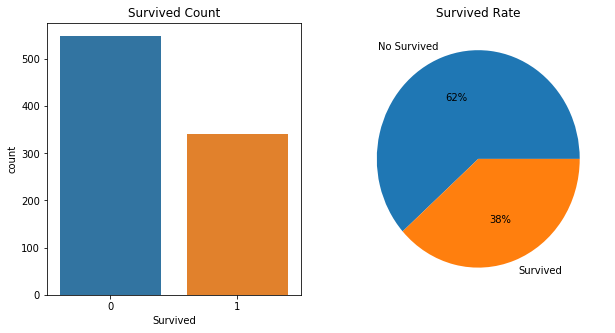

In [4]:
# 图表
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.countplot(x='Survived', data=original_data)
plt.title('Survived Count')

plt.subplot(122)
plt.pie([total_no_survived_num, total_survived_num],labels=['No Survived','Survived'],autopct='%1.0f%%')
plt.title('Survived Rate') 

plt.show()

In [14]:
# 不同级别客舱的人数和比例
original_data[['Pclass','Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


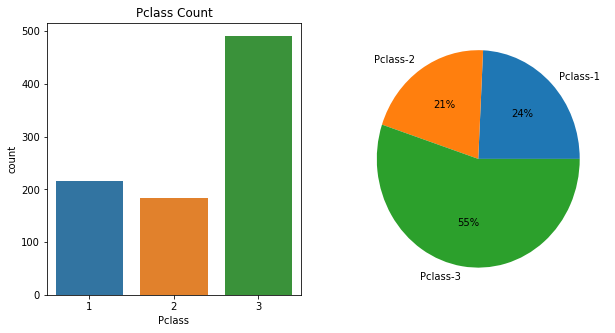

In [17]:


# 图表
plt.figure(figsize= (10 ,5))
plt.subplot(121)
sns.countplot(x='Pclass', data=original_data)
plt.title('Pclass Count') 

plt.subplot(122)
plt.pie(original_data[['Pclass','Survived']].groupby(['Pclass']).count(),\
        labels=['Pclass-1','Pclass-2','Pclass-3'],autopct='%1.0f%%')

plt.show()

In [18]:
# 不同级别客舱生还人数和占总生还人数的比例
survived_df = original_data[original_data[ 'Survived'] == 1 ]
survived_df[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


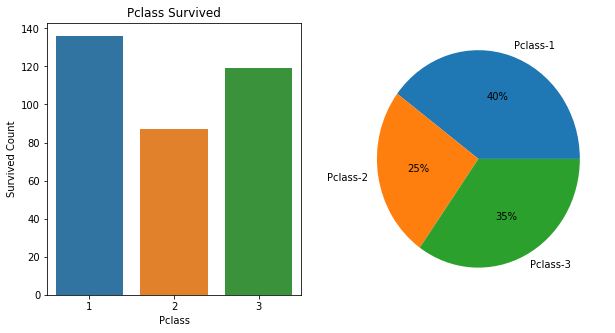

In [19]:
plt.figure(figsize= (10, 5))
plt.subplot(121)
sns.countplot(x='Pclass', data=survived_df)
plt.title('Pclass Survived') 
plt.ylabel('Survived Count')

plt.subplot(122)
plt.pie(survived_df[['Pclass','Survived']].groupby(['Pclass']).sum(),\
        labels=['Pclass-1','Pclass-2','Pclass-3'],autopct='%1.0f%%')
plt.show()

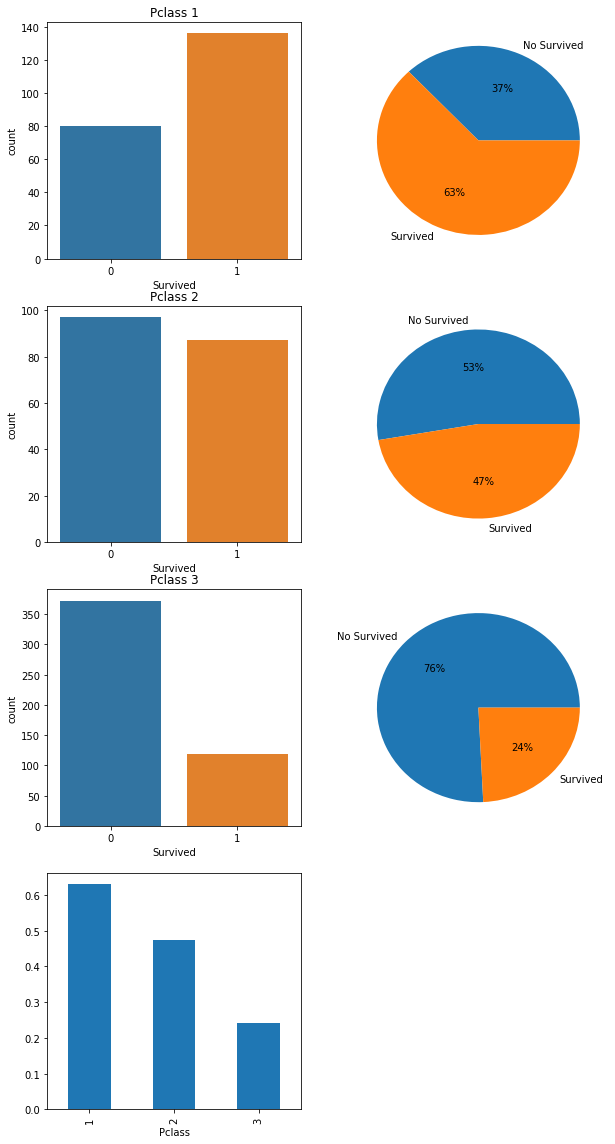

In [16]:
# 不同客舱分别的生还和未生还人数及生还率
pclass1 = original_data[original_data['Pclass'] == 1]
pclass2 = original_data[original_data['Pclass'] == 2]
pclass3 = original_data[original_data['Pclass'] == 3]

plt.figure(figsize=(10,20))
plt.subplot(421)
sns.countplot(x = 'Survived', data = pclass1)
plt.title('Pclass 1') 

plt.subplot(422)
plt.pie([pclass1['Survived'][pclass1['Survived'] == 0].count(),pclass1['Survived'][pclass1['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(423)
sns.countplot(x = 'Survived', data = pclass2)
plt.title('Pclass 2') 

plt.subplot(424)
plt.pie([pclass2['Survived'][pclass2['Survived'] == 0].count(),pclass2['Survived'][pclass2['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(425)
sns.countplot(x = 'Survived', data = pclass3)
plt.title('Pclass 3') 

plt.subplot(426)
plt.pie([pclass3['Survived'][pclass3['Survived'] == 0].count(),pclass3['Survived'][pclass3['Survived'] == 1].count()],\
labels=['No Survived', 'Survived'],autopct='%1.0f%%')

plt.subplot(427)
survived_by_pclass = original_data.groupby('Pclass')['Survived'].mean()
survived_by_pclass.plot(kind = 'bar')

plt.show()